In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Our dataset
iris = load_iris()
X = iris.data[:, :2]
t = iris.target
y = (iris.target != 1) # *1
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
#intercept = np.ones((X.shape[0], 1))
intercept = np.ones((X.shape[0], 1)) # Bilde einen Vektor von 1'en mit einer LÄnge von den Daten X
pd.DataFrame(np.concatenate((intercept, X), axis=1))
theta = np.zeros(X.shape[1])
np.dot(X,theta).shape

In [10]:
class LogisticRegression1:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, pr_iter =False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.pr_iter = pr_iter
    
    # Erstselle hier eine Matrix Theta mit unseren Datenpunkten
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  # Bilde einen Vektor von 1'en mit einer Länge von den Daten X, da w_0 = 1
        return np.concatenate((intercept, X), axis=1) # Bilde eine (Länge der Daten X Mal Anzahl der Spalten + 1, da w_o = 1 ist)
    
    # Unsere Sigmoidfunktion: g(z) = 1/(1 + exp(-z))
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Unsere Fehlerfunktion ist die Log-Loss Funktion (Binärer Fall): 
    # Mit h(X*Theta) -> J(Theta) = (1/m) * (-y * log(h) - (1 - y) * log(1-h) )
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Fitting des Modells
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization (Theta sind unsere Gewichte.....)
        self.theta = np.zeros(X.shape[1]) # Erstellung einer 0-Matrix der Spaltenlänge von X
        
        for step in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z) # Unsere Sigmoidfunktion
            # Unser Gradient ist unser log los
            gradient = np.dot(X.T, (h - y)) / y.shape[0] # Unser Gradientenabstieg =  X^T (Y - Predictions), wobei Y = sigmoid(z) mit z = Theta^T * X 
            self.theta -= self.lr * gradient # Theta sind unsere Gewichte
            
            if (self.pr_iter == True) and (step % 10000 == 0): # Bei jeder 10.000 Iteration ausprinten
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
                
        return self.theta
    
    # Unsere Wahrscheinlichkeiten für X.
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta)) # Mit g(z) = 1/(1 + exp(-z)), wobei z = Theta^T* X
    
    def predict(self, X, threshold):
        return self.predict_proba(X) >= threshold # Threshold wird erstmal auf 0,5 gesetzt

In [29]:
# Picking a learning rate = 0.1 and number of iterations = 300000 the algorithm classified all instances successfully. 
model = LogisticRegression1(lr=0.1, num_iter=300000, pr_iter = False)

%time mo = model.fit(X, y)

pred_own = model.predict(X, 0.4)
#print(y)
# accuracy
print((pred_own == y).mean())
#mo
#preds

Wall time: 6.09 s
0.72


In [30]:
model.theta

array([-8.025147  , -0.14035595,  3.21420697])

In [69]:
# ROC Curve 
# Total
sum_every = (pred_own == y)
sum_not = (pred_own != y)
total_good = np.sum(sum_every)
total_bad = np.sum(sum_not)

TPR_list = []
FPR_list = []
cum_TP = 0
cum_FP = 0

for i in range(len(X)):
    if sum_not[i] > 0:
        cum_TP += sum_not[len(X) - 1 -i]
        cum_FP += sum_every[len(X) - 1 -i]
    
        
        
#cum_TP
#cum_FP
#total_bad

12

Text(0,0.5,'Richtig-positiv-Rate')

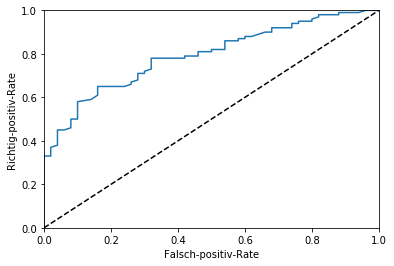

In [42]:
# Unser Vergleich
from sklearn.metrics import roc_curve
y_score = model.predict_proba(X)

fpr, tpr, threshold = roc_curve(y, y_score)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Falsch-positiv-Rate')
plt.ylabel('Richtig-positiv-Rate')


In [35]:
# Unser Vergleich
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e15)

%time lr.fit(X, y)

preds = lr.predict(X)

# accuracy
print((preds == y).mean())

lr.intercept_, lr.coef_

Wall time: 958 µs
0.7133333333333334


(array([-8.02448467]), array([[-0.14038305,  3.21403399]]))